# Linear Regression - Project Exercise

Congratulations! You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!

Just follow the steps below to analyze the customer data (it's fake, don't worry I didn't give you real credit card numbers or emails).

## Imports
** Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline 
(You'll import sklearn as you need it.)**

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

** Read in the Ecommerce Customers csv file as a DataFrame called customers.**

In [2]:
data_file=pd.read_csv('Ecommerce Customers')

**Check the head of customers, and check out its info() and describe() methods.**

In [3]:
data_file.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
data_file.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
data_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


## Exploratory Data Analysis

**Let's explore the data!**



In [6]:
data_file.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

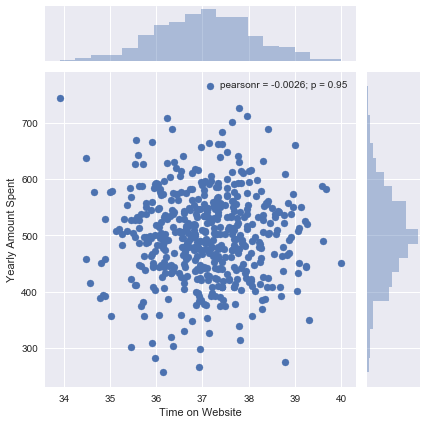

In [7]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=data_file)

Based on the above graph, there isnt any correlation between "Time on Website" and "Yearly Amount Spent"
A large p value also indicates that there is no relation between two variables

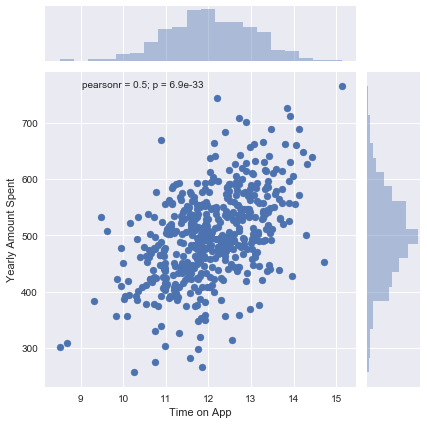

In [8]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=data_file)

The above graph clearly shows a positive tend, looks like as "Time on App" increase the "Yearly Amount Spent" also increases
A very small p value indicates that the null hypothesis is false,  and hence the alternate hypothesis that there is relation between two variables holds true

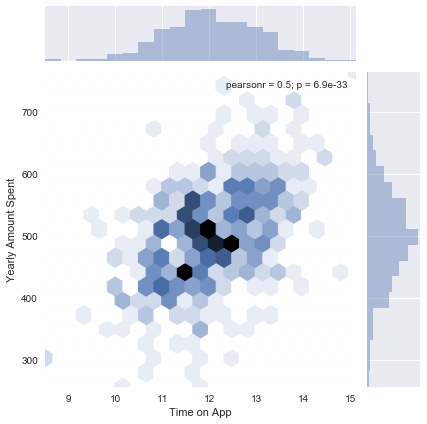

In [9]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=data_file,kind="hex")

The max amount of Time on App is between 11 and 13

**Let's explore these types of relationships across the entire data set. Use [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) to recreate the plot below.(Don't worry about the the colors)**

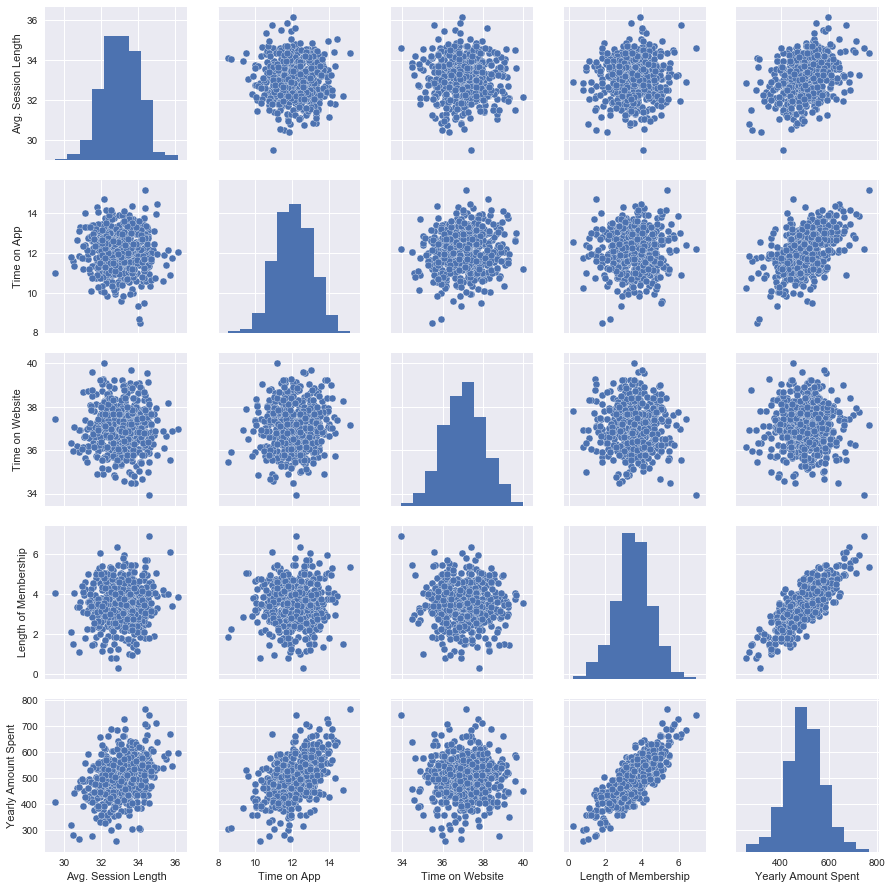

In [10]:
sns.pairplot(data_file)

**Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?**

Length of membership looks more correlated feature followed by Time on App.
Lets create a linear model plot and check the results.

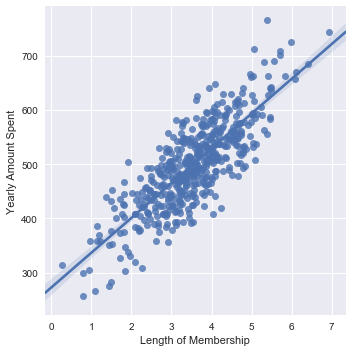

In [11]:
sns.lmplot(x="Length of Membership",y="Yearly Amount Spent",data=data_file)

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
** Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
data_file.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [14]:
X=data_file[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
y=data_file['Yearly Amount Spent']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training the Model

Now its time to train our model on our training data!

** Import LinearRegression from sklearn.linear_model **

In [16]:
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression() model named lm.**

In [17]:
lm=LinearRegression()

** Train/fit lm on the training data.**

In [18]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

**Print out the coefficients of the model**

In [19]:
print("Coefficients:",lm.coef_)

Coefficients: [ 25.98154972  38.59015875   0.19040528  61.27909654]


## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Use lm.predict() to predict off the X_test set of the data.**

In [20]:
predictions=lm.predict(X_test)

** Create a scatterplot of the real test values versus the predicted values. **

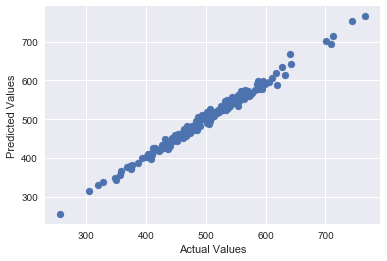

In [21]:
plt.scatter(y_test,predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")


## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

In [29]:
Rsquared=1-(sum((y_test-predictions)**2)/sum((y_test-y_test.mean())**2))
print("RSquared is:",Rsquared)

RSquared is: 0.989004624674


In [30]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [31]:
MAE = mean_absolute_error(y_test,predictions)
MSE = mean_squared_error(y_test,predictions)
RMSE=np.sqrt(MSE)
Rsquared=explained_variance_score(y_test,predictions)

In [32]:
print("MAE:",MAE)
print("MSE:",MSE)
print("RMSE:",RMSE)
print("R2:",Rsquared)

MAE: 7.22814865343
MSE: 79.813051651
RMSE: 8.93381506698
R2: 0.989077123189


## Residuals

You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 



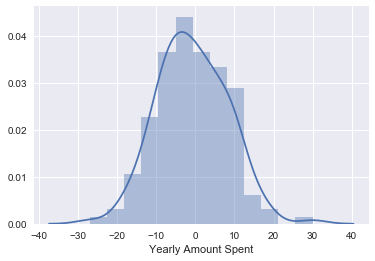

In [26]:
sns.distplot((y_test-predictions))

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

** Recreate the dataframe below. **

In [27]:
X_train.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
202,31.525752,11.340036,37.039514,3.811248
428,31.862741,14.039867,37.022269,3.738225
392,33.258238,11.514949,37.128039,4.662845
86,33.877779,12.517666,37.151921,2.669942
443,33.025020,12.504220,37.645839,4.051382


In [28]:
coeffecients=pd.DataFrame(lm.coef_,X_train.columns,columns=['Coeffecient'])
print(coeffecients)

                      Coeffecient
Avg. Session Length     25.981550
Time on App             38.590159
Time on Website          0.190405
Length of Membership    61.279097


** How can you interpret these coefficients? **

Keeping Other variables constant, 1 unit increase in Avg. Session length is associated with an increase of 25.98 total dollars spent
Similarly we can say same for other varibles

## Great Job!

Congrats on your contract work! The company loved the insights! Let's move on.